# Topicos Avanzados de Inteligencia Artificial
## Instructor: Dr. Luis Felipe Marín Urías
## Facultad de ingeniería Eléctrica y Electrónica
## Universidad Veracruzana

# Bordes en imágenes

In [1]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import glob

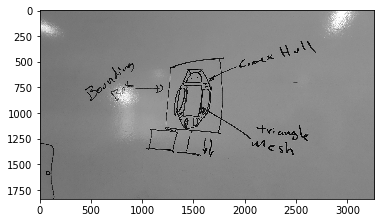

In [24]:
img = cv2.imread("./files/android.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
image = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
image[:,:,2] = 20 # Changes the V value
plt.imshow(img2)

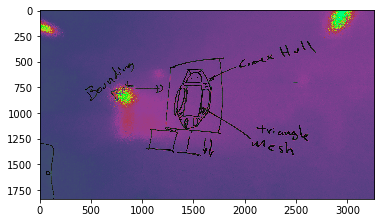

In [25]:
image2=cv2.cvtColor(img2, cv2.COLOR_HSV2RGB)
plt.imshow(image2)

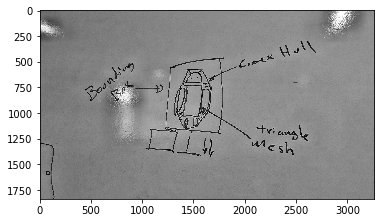

In [3]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(20,20))
cl1 = clahe.apply(img)
imgeq = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
plt.imshow(imgeq)

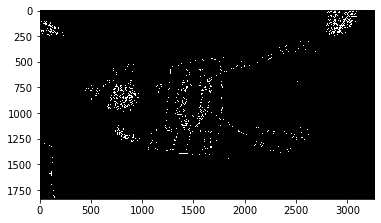

In [4]:
edges = cv2.Canny(imgeq,10,250)
plt.imshow(edges, cmap='gray')

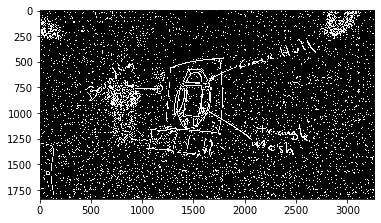

In [5]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,15,2)
th2 = cv2.cvtColor(th2, cv2.COLOR_GRAY2RGB)
plt.imshow(th2)

In [6]:

def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

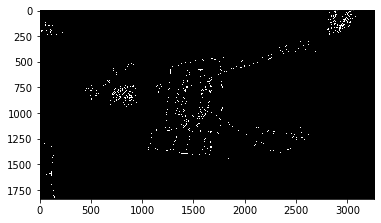

In [7]:
newedge = auto_canny(img2)
newedge = cv2.cvtColor(newedge, cv2.COLOR_GRAY2RGB)
plt.imshow(newedge)

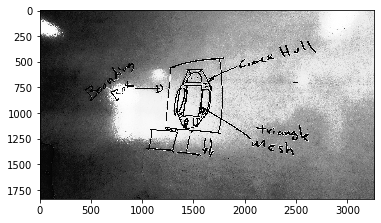

In [8]:
res = cv2.equalizeHist(img)
res2 = cv2.cvtColor(res, cv2.COLOR_GRAY2RGB)
plt.imshow(res2)

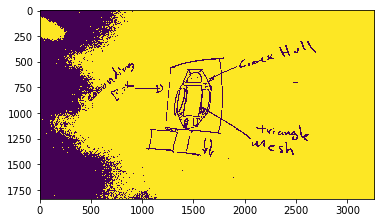

In [9]:
th2, dst2 = cv2.threshold(res, 50, 255, cv2.THRESH_BINARY)

plt.imshow(dst2)


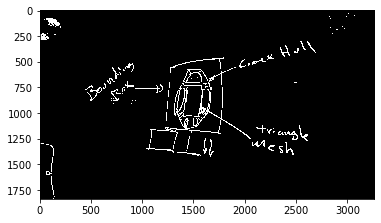

In [10]:
th2, dst3 = cv2.threshold(imgeq, 90, 255, cv2.THRESH_BINARY_INV)
plt.imshow(dst3)

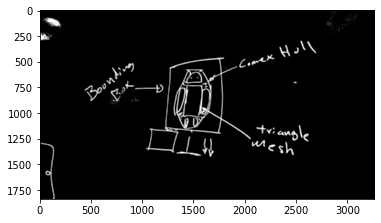

In [11]:
difuminado = cv2.blur(dst3,(15,15))
plt.imshow(difuminado)

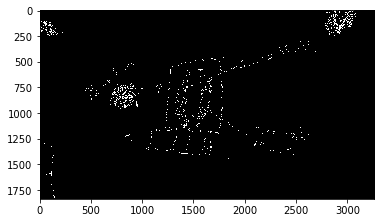

In [12]:
gray = cv2.cvtColor(difuminado, cv2.COLOR_BGR2GRAY)
edges2 = cv2.Canny(img,5,150,apertureSize=3)
plt.imshow(edges2, cmap='gray')

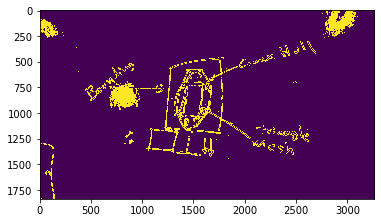

In [13]:
kernel = np.ones((5,5), np.uint8) 
dilatado = cv2.dilate(edges2,kernel)
plt.imshow(dilatado)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


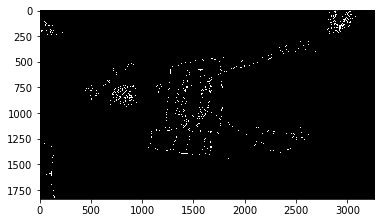

In [14]:
#%matplotlib notebook
m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    edges = cv2.Canny(img,i,255-i)
    ax.imshow(edges, cmap='gray')
    #ax.plot(matrix[i,:])
    fig.canvas.draw()